Fetch the most voted movie in IMDB Movie Database

In [4]:
import sqlite3
import pandas as pd
db  = sqlite3.connect('IMDB.sqlite')

IMDB=pd.read_sql_query("select * from IMDB",db)

most_voted_movie_name=IMDB[IMDB["TotalVotes"]==max(IMDB["TotalVotes"])].values[0][1]
most_voted_movie_rating=IMDB[IMDB["TotalVotes"]==max(IMDB["TotalVotes"])].values[0][2]

print(most_voted_movie_name,most_voted_movie_rating)

Inception (2010) 8.8


Fetch the Movie with Longest-Running Time from IMDB Movie database

In [5]:
import sqlite3
import pandas as pd
db = sqlite3.connect('IMDB.sqlite')
data = pd.read_sql_query('select * from IMDB',db)
for i in range(len(data)):
    if data.Runtime[i] == "":
        data.Runtime[i] = 0
    else :
        data.Runtime[i] = data.Runtime[i].split()
        data.Runtime[i].pop()
        data.Runtime[i] = ''.join(data.Runtime[i])
        data.Runtime[i] = int(float(data.Runtime[i]))
maxRun = max(data.Runtime)
for i in range(len(data)):
    if data.Runtime[i] == maxRun :
        print(data.Title[i],end=" ")
        print(data.Runtime[i])

The Wolf of Wall Street (2013) 180


C:\Users\ajayc\AppData\Local\Temp\ipykernel_75656\144770284.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Runtime[i] = data.Runtime[i].split()
C:\Users\ajayc\AppData\Local\Temp\ipykernel_75656\144770284.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Runtime[i] = ''.join(data.Runtime[i])
C:\Users\ajayc\AppData\Local\Temp\ipykernel_75656\144770284.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Runtime[i] 

Fetch the movie which has maximum net profit in IMDB Movie Database.

In [6]:
import pandas as pd
import sqlite3
db  = sqlite3.connect('IMDB.sqlite')
data=pd.read_sql_query("select Title,Budget,Domestic,Worldwide from IMDB join earning on IMDB.Movie_id=earning.Movie_id",db)
data['Budget'] = pd.to_numeric(data['Budget'])
data['totalEarn'] = data.Domestic + data.Worldwide 
data['Profit'] = data['totalEarn'] - data.Budget
maxProfit = max(data.Profit)
for i in range(len(data)):
    if data.Profit[i] == maxProfit:
        print(data.Title[i])
        break
    


Star Wars: The Force Awakens (2015)


Fetch the least budgeted movie in IMDB Movie Database.

In [7]:
import pandas as pd
import sqlite3
db  = sqlite3.connect('IMDB.sqlite')
data=pd.read_sql_query("select Title,Budget,Domestic,Worldwide from IMDB join earning on IMDB.Movie_id=earning.Movie_id",db)
data['Budget'] = pd.to_numeric(data['Budget'])
minBudget = min(data.Budget)
l = []
profit = []
min = 10000000000000000000000000
for i in range(len(data)):
    if data.Budget[i] == minBudget:
        val = data.Domestic[i] + data.Worldwide[i] - data.Budget[i]
        l.append(i)
        profit.append(val)
max = max(profit)
for q in range(len(l)):
    if profit[q] == max:
        v = l[q]
        print(data.Title[v])
        break

Short Term 12 (2013)


Fetch the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database year wise.

In [8]:
import pandas as pd
import sqlite3 as sql
import numpy as np
db=sql.connect('IMDB.sqlite')
data1=pd.read_sql_query("Select * from IMDB",db)
data2=pd.read_sql_query("Select * from earning",db)
data2["Year"]=data1["Title"].apply(lambda x:int(x[-5:-1]))
Year_li=list(data2["Year"].unique())
Year_li.sort()
data2["Total_Earning"]=data2["Domestic"]+data2["Worldwide"]
for i in Year_li:
    data3=data2[data2["Year"]==i]
    Max_fund=data3["Total_Earning"].max()
    Movie_id=data2[data2["Total_Earning"]==Max_fund].iloc[0][0]
    print(i,data1[data1["Movie_id"]==Movie_id].iloc[0][1])
    

2010 Toy Story 3 (2010)
2011 Rise of the Planet of the Apes (2011)
2012 The Avengers (2012)
2013 The Hunger Games: Catching Fire (2013)
2014 Guardians of the Galaxy (2014)
2015 Star Wars: The Force Awakens (2015)
2016 Rogue One (2016)


Fetch the percentage of the budget for each genre in IMDB Movie Dataset

Biography 2.45
Drama 10.25
History 0.68
Adventure 23.7
Comedy 6.82
Romance 1.06
Fantasy 4.29
 5.56
Action 16.98
Mystery 1.84
Sci-Fi 10.18
Animation 7.23
Thriller 3.77
Sport 0.43
Western 0.54
Crime 1.67
War 0.34
Family 1.8
Music 0.15
Musical 0.24
Horror 0.03


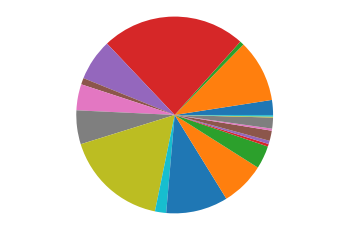

In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
db = sqlite3.connect('IMDB.sqlite')
data = pd.read_sql_query('select genre,Budget from IMDB join genre on IMDB.Movie_id = genre.Movie_id',db)
u = data['genre'].unique()
d={}
data['Budget'] = pd.to_numeric(data['Budget'])
data.Budget= data.Budget.fillna(0)
for i in range(len(data)):
    if data.Budget[i] == " ":
        data.Budget[i] = 0
    if data.genre[i] in d : 
        d[data.genre[i]] += data.Budget[i]
    else:
        d[data.genre[i]] = data.Budget[i]
sum = data.Budget.sum()
l = []
for i in d :  
    val = (d[i]/sum)*100
    val = round(val,2)
    d[i] = val 
    l.append(d[i])
for i in d :
    print(i,end=" ")
    print(d[i])
plt.pie(l)
plt.axis("equal")
plt.show()

Fetch the percentage of the total earning for each genre in IMDB Movie Dataset.

In [10]:
import pandas as pd
import sqlite3
import numpy as np
db=sqlite3.connect('IMDB.sqlite')
imdb=pd.read_sql_query("Select * from IMDB",db)
earning=pd.read_sql_query("Select * from earning",db)
genre=pd.read_sql_query("Select * from genre",db)
movie_id=genre['Movie_id'].value_counts().index
genre_array=[]
for i in range(len(movie_id)):
    single_genre=[]
    single=genre[genre['Movie_id']==movie_id[i]]['genre'].values
    single_genre.append(movie_id[i])
    for i in single:
        single_genre.append(i)
    genre_array.append(single_genre)
new_genre=pd.DataFrame(genre_array,columns=['Movie_id','genre_1','genre_2','genre_3'])
result = pd.merge(imdb,new_genre,on='Movie_id')
imdb_earning_genre=pd.merge(result,earning,on='Movie_id')
imdb_earning_genre['Domestic'].replace('',0,inplace=True)
imdb_earning_genre['Worldwide'].replace('',0,inplace=True)
imdb_earning_genre['Total Earning']=imdb_earning_genre['Domestic']+imdb_earning_genre['Worldwide']
genre_1_name=imdb_earning_genre.groupby('genre_1')['Total Earning'].sum().index
genre_1_amount=imdb_earning_genre.groupby('genre_1')['Total Earning'].sum().values
genre_2_name=imdb_earning_genre.groupby('genre_2')['Total Earning'].sum().index
genre_2_amount=imdb_earning_genre.groupby('genre_2')['Total Earning'].sum().values
genre_3_name=imdb_earning_genre.groupby('genre_3')['Total Earning'].sum().index
genre_3_amount=imdb_earning_genre.groupby('genre_3')['Total Earning'].sum().values
genre_name={}
for i in range(len(genre_1_name)):
    genre_name[genre_1_name[i]]=genre_1_amount[i]
for i in range(len(genre_2_name)):
    if genre_2_name[i] in genre_name:
        genre_name[genre_2_name[i]]=genre_name.get(genre_2_name[i])+genre_2_amount[i]
    else:
        genre_name[genre_2_name[i]]=genre_2_amount[i]
for i in range(len(genre_3_name)):
    if genre_3_name[i] in genre_name:
        genre_name[genre_3_name[i]]=genre_name.get(genre_3_name[i])+genre_3_amount[i]
    else:
        genre_name[genre_3_name[i]]=genre_3_amount[i]
del genre_name['']
genre_names=np.array(list(genre_name.keys()))
genre_amount=np.array(list(genre_name.values()))
perAmount=np.true_divide(genre_amount, genre_amount.sum())*100
for i in range(len(genre_names)):
    print(genre_names[i],format(perAmount[i],'.2f'))

Action 17.91
Adventure 23.57
Animation 6.77
Biography 3.42
Comedy 7.69
Crime 1.55
Drama 11.96
Mystery 2.01
Family 1.05
Fantasy 5.15
History 1.04
Horror 0.01
Music 0.43
Musical 0.38
Romance 1.45
Sci-Fi 9.95
Sport 0.32
Thriller 4.42
War 0.25
Western 0.65


Fetch the movie which has genre of 'Sci-Fi' and 'Mystery' and movie rating is greater or equal to 8 from IMDB Movie Database

In [11]:
import sqlite3 as sql
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

db=sql.connect('IMDB.sqlite')
data1=pd.read_sql_query('Select * from genre',db)
data2=pd.read_sql_query('Select * from IMDB',db)
MovieId_li=list(data2["Movie_id"].unique())
Movie_name=""
for i in MovieId_li:
    data3=data1[data1["Movie_id"]==i]
    genre_li=list(data3["genre"])
    if "Sci-Fi" in genre_li and "Mystery" in genre_li:
        data4=data2[data2["Movie_id"]==i]
        if data4.iloc[0][2]>=8:
            Movie_name=data4.iloc[0][1]
            break
print(Movie_name)            
    

Arrival (2016)
